Eigenvalue for mode  1 :  0.9997357911342988  # of loops:  85
Eigenvalue for mode  2 :  2.9990026016166667  # of loops:  74
Eigenvalue for mode  3 :  4.998463052921579  # of loops:  64
Eigenvalue for mode  4 :  6.997581023388193  # of loops:  57
Eigenvalue for mode  5 :  8.996253031902597  # of loops:  50
(81, 5)


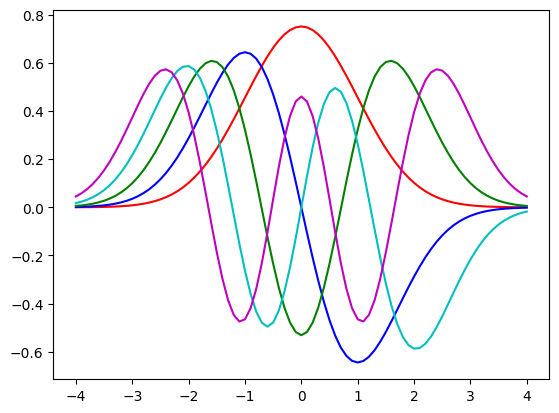

[0.99973579 2.9990026  4.99846305 6.99758102 8.99625303]
[0.00025602 0.00145261 0.00565784 0.0174247  0.04497164]
[0.00025715 0.00145536 0.00566847 0.01745432 0.04498222]
A3 first 5 rows: 
[[0.00013853 0.00074165 0.00269571 0.00762573 0.01765086]
 [0.00029698 0.00157509 0.00567113 0.01589013 0.03642595]
 [0.00049764 0.0026009  0.00922602 0.0254613  0.05746844]
 [0.00076518 0.00392434 0.01365257 0.03693032 0.08164566]
 [0.00112982 0.00566741 0.01926662 0.05087509 0.10966403]]

A3 last 5 rows: 
[[0.00112982 0.00566741 0.01926662 0.05087509 0.10966403]
 [0.00076518 0.00392434 0.01365257 0.03693032 0.08164566]
 [0.00049764 0.0026009  0.00922602 0.0254613  0.05746844]
 [0.00029698 0.00157509 0.00567113 0.01589013 0.03642595]
 [0.00013853 0.00074165 0.00269571 0.00762573 0.01765086]]

First five eigenvalues i.e. A4: [0.99937508 2.99688587 4.9920678  6.98616307 8.98531949]



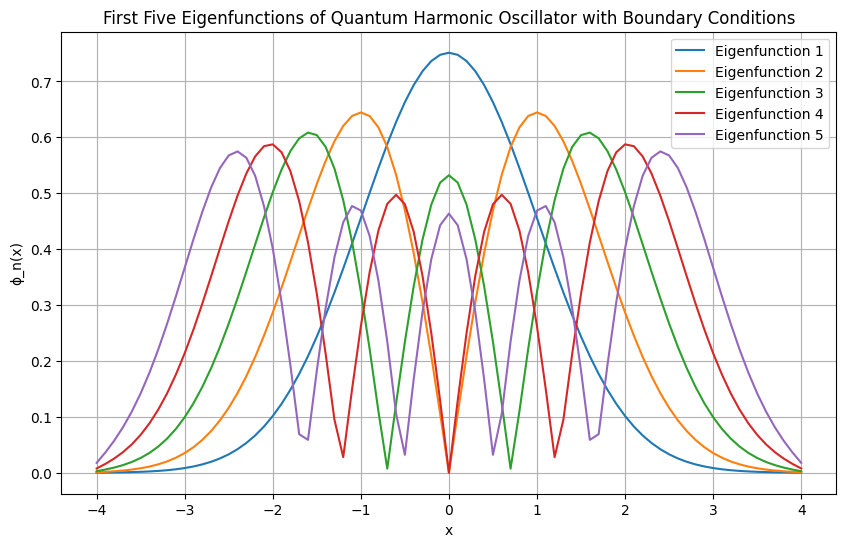

Gamma: -0.05, Modes: 0
Epsilon loops: 142  Area loops: 22
Gamma: -0.05, Modes: 1
Epsilon loops: 46  Area loops: 83
Gamma: 0.05, Modes: 0
Epsilon loops: 183  Area loops: 29
Gamma: 0.05, Modes: 1
Epsilon loops: 28  Area loops: 84

Eigenvalues for 0.05: (1.012935, 4.315491) 
Eigenvalues for -0.05: (0.974051, 4.277976)

A5 shape: (41, 2)  A6 shape: (2,)  A7 shape: (41, 2)  A8 shape: (2,)
A6: [1.01293532 4.31549072]
A8: [0.97405066 4.27797596]

A5 sample: 
[[0.11063379 0.72486719]
 [0.13142714 0.72334416]
 [0.15562278 0.71692344]
 [0.1832877  0.70299675]
 [0.21439796 0.679294  ]]
A7 sample: 
[[0.10904687 0.72584375]
 [0.12968652 0.72426418]
 [0.15373106 0.71767314]
 [0.18125916 0.70346966]
 [0.21225956 0.6794024 ]]
Slope of line using RK45: 5.244667561772169
Slope of line using RK23: 3.0190995295045018
Slope of line using Radau: 4.038199269261614
Slope of line using BDF: 6.457512609631294
[5.24466756 3.01909953 4.03819927 6.45751261]
(4,)


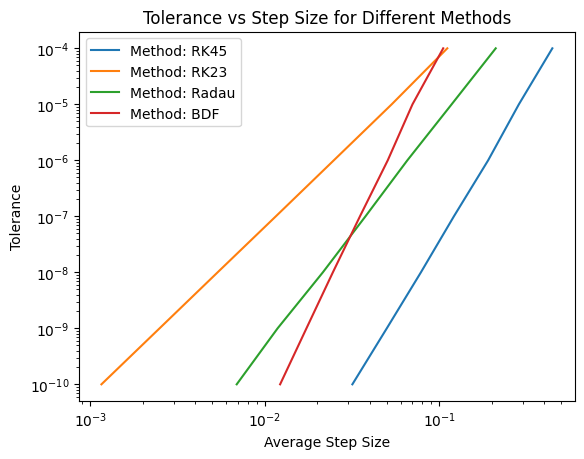

A11: [0.02642089 0.03324661 0.03073894 0.03455681 0.04163298]
A10 shape: (5,)
A11 shape: (5,)
A10: [4.57691903e-08 1.72426902e-07 2.47863326e-07 4.35487151e-07
 1.93824787e-06]

A13: [0.06249236 0.10380439 0.15864399 0.19767046 0.16311675]
A12 shape: (5,)
A13 shape: (5,)
A12: [2.16225197e-07 1.91550936e-06 1.09322873e-05 6.97116970e-05
 4.64902937e-04]
(81, 5)
(5,)
(81, 5)
(5,)
(41, 2)
(2,)
(41, 2)
(2,)
(4,)
(5,)
(5,)
(5,)
(5,)


In [2]:
import numpy as np
from scipy.linalg import eigh  # For solving the eigenvalue problem
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.sparse import diags
from scipy.sparse.linalg import eigs
from scipy.integrate import solve_bvp, solve_ivp
from scipy.special import hermite


'''Part A'''

def oursystem(x, y, epsilon):
    return [y[1], (K * x**2 - epsilon) * y[0]]

tol = 1e-4 # define a tolerance level
col = ['r', 'b', 'g', 'c', 'm', 'k'] # eigenfunc colors
n0 = 1.5
L = 4
K = 1
xspan =  np.arange(-L, L+0.1, 0.1)

def boundary_conditions(zl, zr, epsilon):
    left_bc = zl[1] - np.sqrt(max(L**2 - epsilon, 0)) * zl[0]  # BC at x = -L
    right_bc = zr[1] + np.sqrt(max(L**2 - epsilon, 0)) * zr[0]  # BC at x = L
    return [left_bc, right_bc]

A1 = np.zeros((len(xspan), 5))
A2 = np.array([0.0, 0.0, 0.0, 0.0, 0.0])

epsilon_start = n0  # beginning value of beta

for modes in range(1, 6):  # begin mode loop
    epsilon = epsilon_start

    depsilon = 4  # default step size in beta

    times_above = 0

    for _ in range(1000):  # begin convergence loop for beta

        x0 = [1, np.sqrt(L**2 - epsilon)]

        #z = odeint(oursystem, x0, xspan, args=(epsilon,), tfirst=True)  ORIGINAL solving method

        z = solve_ivp(lambda x, y: oursystem(x, y, epsilon),
                              [-L, L+0.1], x0, t_eval=xspan)

        solution = z.y

        zl = solution[:, 0]  # Value at x = -L
        zr = solution[:, -1]  # Value at x = L

        bc = boundary_conditions(zl, zr, epsilon)

        if abs(bc[1]) < tol:  # If the boundary condition is satisfied at x = L
            break  # Convergence achieved

        if ((-1) ** (modes + 1)) * bc[1] < 0:
            epsilon -= depsilon / 2
            #epsilon_high = epsilon
            times_above = times_above + 1

        else:
            epsilon += depsilon / 2
            depsilon /= 2
            #epsilon_low = epsilon

    print("Eigenvalue for mode ", modes, ": ", epsilon, " # of loops: ", _)

    #NEW
    norm = np.trapz(solution[0, :] * solution[0, :], xspan)  # calculate the normalization
    normalized_eigenfunction = solution[0, :] / np.sqrt(norm)

    # Store the normalized eigenfunction in the corresponding column of A1
    A1[:, modes - 1] = np.abs(normalized_eigenfunction)

    A2[modes - 1] = epsilon

    epsilon_start = epsilon + 1 # after finding eigenvalue, pick new start
    plt.plot(xspan, solution[0, :] / np.sqrt(norm), col[modes - 1])  # plot modes


print(A1.shape)
plt.show()  # end mode loop
print(A2)
print(A1[0, :])
print(A1[-1, :])

'''Part B Draft 2'''

L = 4
K = 1
h = 0.1

x = np.arange(-L, L + h, h)
N = len(x)

A3 = np.zeros((len(x), 5))
A4 = np.array([0.0, 0.0, 0.0, 0.0, 0.0])

# Define the main diagonal and off-diagonals
main_diag = -2 / h**2 - (K * x**2)
off_diag_left = np.ones(N - 1) / h**2
off_diag_right = np.ones(N - 1) / h**2

# Incorporate the boundary conditions
main_diag[0] += (4 / 3)
main_diag[-1] += (4 / 3)
off_diag_right[0] -= (1 / 3)
off_diag_left[-1] -= (1 / 3)

# Construct the sparse matrix A
diagonals = [main_diag, off_diag_left, off_diag_right]
A = diags(diagonals, offsets=[0, -1, 1], format='csr') / -1

# Solve the eigenvalue problem with eigs for the 5 smallest eigenvalues
eigenvalues, eigenfunctions = eigs(A, k=5, which='SR')  # SR: Smallest Real part

# Sort eigenvalues and eigenfunctions
idx = eigenvalues.argsort()
eigenvalues = eigenvalues.real[idx]
eigenfunctions = eigenfunctions.real[:, idx]


# Normalize eigenfunctions
#norm = np.array([np.trapz(abs(eigenfunctions[:, i])**2, x) for i in range(5)])
norm = np.array([np.trapz(eigenfunctions[:, i] * eigenfunctions[:, i], x) for i in range(5)])
eigenfunctions = eigenfunctions / np.sqrt(norm)

A3 = np.abs(eigenfunctions)
A4 = eigenvalues

print(f"A3 first 5 rows: \n{A3[:5, :]}")
#print(f"A3 second row: {A3[1, :]}")
print()
print(f"A3 last 5 rows: \n{A3[-5:, :]}")
#print(f"A3 last row: {A3[-1, :]}")
print()
print(f"First five eigenvalues i.e. A4: {A4}")
print()


# Plot the first five eigenfunctions
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(x, abs(eigenfunctions[:, i]), label=f"Eigenfunction {i+1}")

plt.title('First Five Eigenfunctions of Quantum Harmonic Oscillator with Boundary Conditions')
plt.xlabel('x')
plt.ylabel('ϕ_n(x)')
plt.legend()
plt.grid(True)
plt.show()


'''Problem (c)'''

L = 2
x_span = np.arange(-L, L+0.1, 0.1)
tol = 1e-4

A5 = np.zeros((len(x_span), 2))
A6 = np.array([0.0, 0.0])

A7 = np.zeros((len(x_span), 2))
A8 = np.array([0.0, 0.0])

for gamma in [-.05, .05]:   #Begin outer most loop for our 2 gamma values
  epsilon_start = .01

  def bvp_rhs(x, y, epsilon):   #derivative problem defined based on current gamma value
    return np.array([y[1], (x**2 - epsilon) * y[0] + gamma * y[0]**3])

  for modes in range(2):   #Begin modes loop to find two solutions for each gamma value
    A = 1e-3
    dA = .01
    print("Gamma: %s, Modes: %s" % (gamma, modes))

    for i in range(1000):   #Begin loop to find A

      epsilon = epsilon_start
      depsilon = .5

      for _ in range(1000):   #Begin loop to find epsilon

        y0 = np.array([A, np.sqrt(max(L**2 - epsilon, 0)) * A])

        solution = solve_ivp(lambda x, y: bvp_rhs(x, y, epsilon),
                              [-L, L+0.1], y0, t_eval=x_span)

        BS2 = solution.y  # Access the solution directly from solution.y


        boundary_value_check = abs(BS2[1, -1] + np.sqrt(max(L**2 - epsilon, 0)) * BS2[0, -1])

        if boundary_value_check < tol:
            break

        if -1 * (BS2[1, -1] + np.sqrt(max(L**2 - epsilon, 0)) * BS2[0, -1]) > 0:
          epsilon -= depsilon

        else:
          epsilon += depsilon

          if epsilon > L**2:
            epsilon -= depsilon / 2

          if depsilon > 1e-10:
            depsilon *= .9

      sol_squared = BS2[0]**2

      Area = np.trapz(sol_squared, x_span)

      if Area - 1 < tol and Area - 1 > 0:
        print(f"Epsilon loops: {_}  Area loops: {i}")
        if gamma > 0:
          A5[:, modes] = BS2[0]
          A6[modes] = epsilon

        else:
          A7[:, modes] = BS2[0]
          A8[modes] = epsilon

        epsilon_start = epsilon + 2   #move beginning epsilon value having already found one
        break

      if Area < 1:
        A += dA

      else:
        A -= dA/2
        dA /= 2



print(f"\nEigenvalues for 0.05: {round(A6[0], 6), round(A6[1], 6)} \nEigenvalues for -0.05: {round(A8[0], 6), round(A8[1], 6)}")
print(f"\nA5 shape: {A5.shape}  A6 shape: {A6.shape}  A7 shape: {A7.shape}  A8 shape: {A8.shape}")
print(f"A6: {A6}")
print(f"A8: {A8}")
print()
print(f"A5 sample: \n{A5[:5, :]}")
print(f"A7 sample: \n{A7[:5, :]}")


'''Part D'''


L = 2
x_span = np.arange(-L, L + 0.1, 0.1)
#tol = 1e-4
epsilon = 1
K = 1
tol_span = np.arange(4., 11., 1)
tol_values = -1 * tol_span

x_vals = np.empty(len(tol_span))
y_vals = np.empty(len(tol_span))

A9 = np.array([0.0, 0.0, 0.0, 0.0])

def oursystem(x, y):
    return [y[1], (K * x**2 - epsilon) * y[0]]

method_var = ['RK45', 'RK23', 'Radau', 'BDF']

for mode in method_var:

  for i in tol_values:
      tol = 10**i
      options = {'rtol': tol, 'atol': tol}
      solution = solve_ivp(oursystem, [-L, L], [1, np.sqrt(K * L**2 - 1)], method=mode, dense_output=True, **options)

      x_solution = solution.t
      y_solution = solution.y

      avg_step = np.mean(np.diff(x_solution))

      index = int(-i - 4)
      x_vals[index] = avg_step
      y_vals[index] = tol

  plt.loglog(x_vals, y_vals, label=f'Method: {mode}')
  slope = np.polyfit(np.log(x_vals), np.log(y_vals), 1)[0]
  print(f"Slope of line using {mode}: {slope}")
  A9[method_var.index(mode)] = slope

print(A9)
print(A9.shape)


plt.xlabel('Average Step Size')
plt.ylabel('Tolerance')
plt.title('Tolerance vs Step Size for Different Methods')
plt.legend()

plt.show()

'''Part e'''

A10 = np.empty(len(A2))
A11 = np.empty(len(A2))
A12 = np.empty(len(A4))
A13 = np.empty(len(A4))


def factorial(n):
    result = 1
    for i in range(1, n + 1):
        result *= i
    return result


# Define the first 5 eigenfunctions for the harmonic oscillator with K=1
def GH_eigenfunction(n, x):
    # Gaussian factor
    gaussian_factor = np.exp(-x**2 / 2)
    # Hermite polynomial H_n(x)
    H_n = hermite(n)
    # Normalization constant
    normalization_constant = (1 / np.sqrt(2**n * factorial(n))) * (1 / np.pi**0.25)
    # Eigenfunction
    return normalization_constant * gaussian_factor * H_n(x)

# Generate x values
L = 4  # You can set L to any value you prefer
x_values = np.arange(-L, L+0.1, 0.1)

# Create a matrix with 5 columns, each corresponding to an eigenfunction evaluated at x_values
GH_matrix = np.zeros((len(x_values), 5))
for n in range(5):
    GH_matrix[:, n] = GH_eigenfunction(n, x_values)




#calculate the error f(x)=|| |phi_num| - |phi_exact| || ie trapz of f(x)^2 over x_values
function_diff_a = np.abs(A1) - np.abs(GH_matrix)

for _ in range(5):
  A10[_] = np.trapz(function_diff_a[:, _]**2, x_values)


GH_exact_values = [2*n+1 for n in range(5)]

for i in range(len(A2)):
  A11[i] = (abs(A2[i] - GH_exact_values[i]) / GH_exact_values[i]) * 100




#Comparing to answers from (b)
x_values = np.arange(-L, L+0.1, 0.1)

GH_matrix = np.zeros((len(x_values), 5))
for i in range(5):
    GH_matrix[:, i] = GH_eigenfunction(i, x_values)

#calculate the error f(x)=|| |phi_num| - |phi_exact| || ie trapz of f(x)^2 over x_values
function_diff_b = np.abs(A3) - np.abs(GH_matrix)

for _ in range(5):
  A12[_] = np.trapz(function_diff_b[:, _]**2, x_values)

GH_exact_values = [2*n+1 for n in range(5)]

for i in range(len(A2)):
  A13[i] = (abs(A4[i] - GH_exact_values[i]) / GH_exact_values[i]) * 100





print(f"A11: {A11}")
print(f"A10 shape: {A10.shape}")
print(f"A11 shape: {A11.shape}")
print(f"A10: {A10}")
print()

print(f"A13: {A13}")
print(f"A12 shape: {A12.shape}")
print(f"A13 shape: {A13.shape}")
print(f"A12: {A12}")


print(A1.shape)
print(A2.shape)
print(A3.shape)
print(A4.shape)
print(A5.shape)
print(A6.shape)
print(A7.shape)
print(A8.shape)
print(A9.shape)
print(A10.shape)
print(A11.shape)
print(A12.shape)
print(A13.shape)